In [ ]:
import gzip
import os
import sys
import struct
import numpy as np

read the data from gz file

In [ ]:
def read_image(fi):
    magic, n, rows, columns = struct.unpack(">IIII", fi.read(16))
    assert magic == 0x00000803
    assert rows == 28
    assert columns == 28
    rawbuffer = fi.read()
    assert len(rawbuffer) == n * rows * columns
    rawdata = np.frombuffer(rawbuffer, dtype='>u1', count=n*rows*columns)
    return rawdata.reshape(n, rows, columns).astype(np.float32) / 255.0

In [ ]:
def read_label(fi):
    magic, n = struct.unpack(">II", fi.read(8))
    assert magic == 0x00000801
    rawbuffer = fi.read()
    assert len(rawbuffer) == n
    return np.frombuffer(rawbuffer, dtype='>u1', count=n)

In [ ]:
train_x=read_image(gzip.open('train-images-idx3-ubyte.gz', 'rb'))
train_x.shape

(60000, 28, 28)

In [ ]:
train_y=read_label(gzip.open('train-labels-idx1-ubyte.gz', 'rb'))
train_y.shape

(60000,)

In [ ]:
type(train_x)
type(train_y)

numpy.ndarray

In [ ]:
import matplotlib
import matplotlib.pyplot as plt


In [ ]:
digit=train_x[3000]

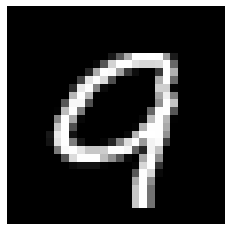

9

In [ ]:
plt.imshow(digit,cmap="gray",interpolation="none")
plt.axis('off')
plt.show()
train_y[3000]

In [ ]:
res=train_x.reshape(60000,-1)
res.shape

(60000, 784)

select all the images that represent zero

In [ ]:
d=[]
sum=1;
for i in range(60000):
    if(train_y[i]==8):
        d.append(res[i])
x_res=np.array(d)

In [ ]:
x_res.shape

(5851, 784)

plot an image of zero before applying PCA

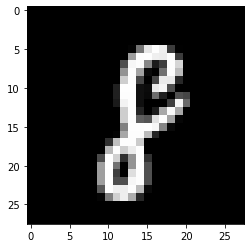

In [ ]:
img=x_res[300].reshape(28,28)
plt.imshow(img,cmap="gray",interpolation="none")
plt.show()

In [ ]:
mn=np.mean(x_res,axis=0)
ymat=x_res-mn


In [ ]:
ymat=ymat.T
cov_mat=np.cov(ymat,bias=True)

In [ ]:
cov_mat.shape

(784, 784)

In [ ]:
import scipy.linalg as la
eigvals, eigvecs = la.eig(cov_mat)
eigvals=eigvals.real
eigvecs=eigvecs.real

In [ ]:
idx = eigvals.argsort()[::1]   
eigvals = eigvals[idx]
eigvecs = eigvecs[:,idx]


In [ ]:
sum=0;
for i in range(784):
  sum=sum+eigvals[i]*eigvals[i]
sum1=0
for i in range(10):
  sum1=sum1+eigvals[i]*eigvals[i]
  print(sum1/sum)


6.499236466490892e-38
8.480928400280076e-38
8.512003521682888e-38
8.5430786430857e-38
8.543578526292189e-38
8.544078409498679e-38
8.544078409498679e-38
8.544078409498679e-38
8.544078409498679e-38
8.544078409498679e-38


In [ ]:
# f=[]
# for j in range(10):
#   f.append(eigvecs[j])
#   ev=np.array(f)
#   pro = ev.dot(ymat)   
#   print(ev.shape)
#   repro=ev.T.dot(pro)
#   repro=repro.T
#   data=repro+mn
#   img=data[300].reshape(28,28)
#   plt.imshow(img,cmap="gray",interpolation="none")
#   plt.show()

(200, 784)


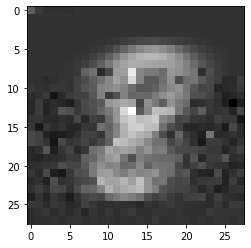

In [ ]:
 
f=[]
for j in range(200):
  f.append(eigvecs[j])
ev=np.array(f)
pro = ev.dot(ymat)   
print(ev.shape)
repro=ev.T.dot(pro)
repro=repro.T
data=repro+mn
img=data[300].reshape(28,28)
plt.imshow(img,cmap="gray",interpolation="none")
plt.show()

plot the same image after PCA

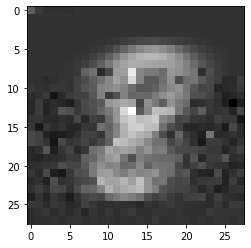

In [ ]:

digit=data[300].reshape(28,28)
plt.imshow(digit,cmap="gray",interpolation="none") 
plt.show()

Add the noise to data

In [ ]:
noise=np.random.normal(0,0.1,[x_res.shape[0],784])

In [ ]:
x_res=x_res+noise

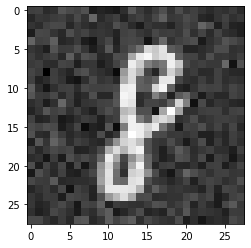

In [ ]:
img=x_res[300].reshape(28,28)
plt.imshow(img,cmap="gray",interpolation="none")
plt.show()

In [ ]:
mn=np.mean(x_res,axis=0)
ymat=x_res-mn
ymat=ymat.T
cov_mat=np.cov(ymat,bias=True)
eigvals, eigvecs = la.eig(cov_mat)
eigvals=eigvals.real
eigvecs=eigvecs.real
idx = eigvals.argsort()[::-1]   
eigvals = eigvals[idx]
eigvecs = eigvecs[:,idx]
f=[]
for j in range(10):
  f.append(eigvecs[j])
ev=np.array(f)
#ev=np.vstack((eigvecs[0],eigvecs[1]))
pro = ev.dot(x_res.T)
repro=ev.T.dot(pro)
repro=repro.T
data=repro+mn


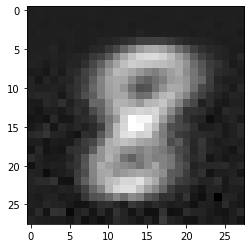

In [ ]:
digit=data[300].reshape(28,28)
plt.imshow(digit,cmap="gray",interpolation="none") 
plt.show()